<a href="https://colab.research.google.com/github/DOMINION-JOHN1/Volatilty-index-price-prediction/blob/main/GoldPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
import yfinance as yf

In [3]:
stock_symbol = 'Gold'
start_date = '1985-01-01'
end_date = '2023-10-30'

# Fetch historical data using yfinance
data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data=pd.DataFrame(data)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1985-02-13,0.000000,0.703125,0.625000,0.625000,0.414614,19680
1985-02-14,0.000000,0.703125,0.625000,0.625000,0.414614,65920
1985-02-15,0.000000,0.703125,0.625000,0.625000,0.414614,31360
1985-02-19,0.000000,0.625000,0.625000,0.625000,0.414614,9120
1985-02-20,0.000000,0.625000,0.625000,0.625000,0.414614,40000
...,...,...,...,...,...,...
2023-10-23,16.719999,16.860001,16.389999,16.549999,16.549999,19608900
2023-10-24,16.340000,16.590000,16.270000,16.559999,16.559999,12439800
2023-10-25,16.520000,16.870001,16.510000,16.580000,16.580000,20366300


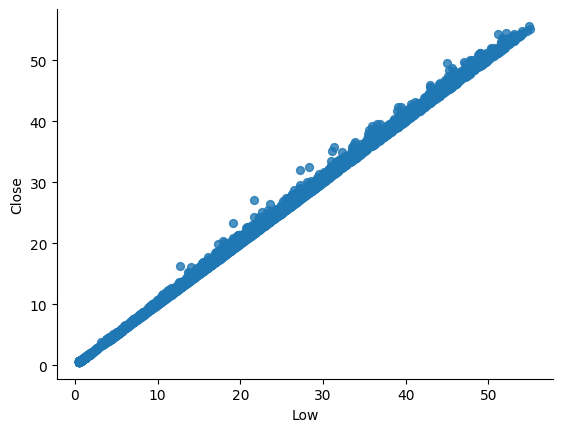

In [5]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
# Convert the "Date" column to a datetime object
data.index = pd.to_datetime(data.index)

# Create a new column for the month of the year (as numbers)
data['Month_Num'] = data.index.month

# Create a new column for the day of the week (as numbers, where Monday is 0 and Sunday is 6)
data['Day_of_Week_Num'] = data.index.dayofweek

# Display the DataFrame with the new columns
data


,Open,High,Low,Close,Adj Close,Volume,Month_Num,Day_of_Week_Num
Date,,,,,,,,
1985-02-13,0.000000,0.703125,0.625000,0.625000,0.414614,19680,2,2
1985-02-14,0.000000,0.703125,0.625000,0.625000,0.414614,65920,2,3
1985-02-15,0.000000,0.703125,0.625000,0.625000,0.414614,31360,2,4
1985-02-19,0.000000,0.625000,0.625000,0.625000,0.414614,9120,2,1
1985-02-20,0.000000,0.625000,0.625000,0.625000,0.414614,40000,2,2
...,...,...,...,...,...,...,...,...
2023-10-23,16.719999,16.860001,16.389999,16.549999,16.549999,19608900,10,0
2023-10-24,16.340000,16.590000,16.270000,16.559999,16.559999,12439800,10,1
2023-10-25,16.520000,16.870001,16.510000,16.580000,16.580000,20366300,10,2


In [7]:
df = data.reset_index(drop=True).drop(columns=['Adj Close'])
df

,Open,High,Low,Close,Volume,Month_Num,Day_of_Week_Num
0,0.000000,0.703125,0.625000,0.625000,19680,2,2
1,0.000000,0.703125,0.625000,0.625000,65920,2,3
2,0.000000,0.703125,0.625000,0.625000,31360,2,4
3,0.000000,0.625000,0.625000,0.625000,9120,2,1
4,0.000000,0.625000,0.625000,0.625000,40000,2,2
...,...,...,...,...,...,...,...
9750,16.719999,16.860001,16.389999,16.549999,19608900,10,0
9751,16.340000,16.590000,16.270000,16.559999,12439800,10,1
9752,16.520000,16.870001,16.510000,16.580000,20366300,10,2
9753,16.549999,16.570000,16.100000,16.299999,23166400,10,3


In [8]:
df['Next Close'] = df['Close'].shift(-1)
df

,Open,High,Low,Close,Volume,Month_Num,Day_of_Week_Num,Next Close
0,0.000000,0.703125,0.625000,0.625000,19680,2,2,0.625000
1,0.000000,0.703125,0.625000,0.625000,65920,2,3,0.625000
2,0.000000,0.703125,0.625000,0.625000,31360,2,4,0.625000
3,0.000000,0.625000,0.625000,0.625000,9120,2,1,0.625000
4,0.000000,0.625000,0.625000,0.625000,40000,2,2,0.625000
...,...,...,...,...,...,...,...,...
9750,16.719999,16.860001,16.389999,16.549999,19608900,10,0,16.559999
9751,16.340000,16.590000,16.270000,16.559999,12439800,10,1,16.580000
9752,16.520000,16.870001,16.510000,16.580000,20366300,10,2,16.299999
9753,16.549999,16.570000,16.100000,16.299999,23166400,10,3,16.330000


In [9]:
 df.dropna(inplace=True)

In [10]:
x = df.drop(['Next Close'], axis=1)
y = df['Next Close']


In [11]:
scaler=RobustScaler()

In [12]:
X=scaler.fit_transform(x)

In [13]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Create a TimeSeriesSplit instance with 3 splits
tscv = TimeSeriesSplit(n_splits=6)

# Split the data
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    "Train:", X_train, y_train
    "Test:", X_test, y_test


In [14]:
X_train.shape

(8361, 7)

In [15]:
X_test.shape

(1393, 7)

In [16]:

X_train_reshaped = X_train.reshape(X_train.shape[0], 1, 7)  # Assuming 7 input features


X_test_reshaped = X_test.reshape(X_test.shape[0], 1, 7)  # Assuming 7 input features

X_test_reshaped.shape



(1393, 1, 7)

In [17]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

timestep=10

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 7), activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(128, activation='relu',return_sequences=True))
model.add(LSTM(64, activation='relu',return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # You can use a different loss function depending on your problem

# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model and make predictions
loss = model.evaluate(X_test_reshaped, y_test)
print(f"Test loss: {loss}")



Epoch 1/50
262/262 [==============================] - 19s 20ms/step - loss: 155.1910 - val_loss: 3.3266
Epoch 2/50
262/262 [==============================] - 5s 20ms/step - loss: 2.3684 - val_loss: 1.3069
Epoch 3/50
262/262 [==============================] - 4s 16ms/step - loss: 0.7949 - val_loss: 0.4990
Epoch 4/50
262/262 [==============================] - 5s 21ms/step - loss: 0.6275 - val_loss: 0.4038
Epoch 5/50
262/262 [==============================] - 4s 17ms/step - loss: 0.5528 - val_loss: 0.3601
Epoch 6/50
262/262 [==============================] - 5s 17ms/step - loss: 0.5589 - val_loss: 0.2972
Epoch 7/50
262/262 [==============================] - 5s 20ms/step - loss: 0.5229 - val_loss: 0.2981
Epoch 8/50
262/262 [==============================] - 4s 17ms/step - loss: 0.4797 - val_loss: 0.6692
Epoch 9/50
262/262 [==============================] - 6s 21ms/step - loss: 0.5665 - val_loss: 0.3418
Epoch 10/50
262/262 [==============================] - 4s 16ms/step - loss: 0.5073 - val

In [18]:
predictions= model.predict(X_test_reshaped)


44/44 [==============================] - 1s 3ms/step


In [19]:
np.array([y_test])

array([[13.26000023, 13.31999969, 13.17000008, ..., 16.57999992,
        16.29999924, 16.32999992]])

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
mean_absolute_error(y_test[:-1], predictions[:-1])


0.44644120780900975

In [22]:
mean_squared_error(y_test[:-1], predictions[:-1])

0.34199547554149917

In [23]:
np.array(y_test)

array([13.26000023, 13.31999969, 13.17000008, ..., 16.57999992,
       16.29999924, 16.32999992])

In [24]:
predictions

array([[12.841818],
       [13.113747],
       [13.048504],
       ...,
       [16.153526],
       [16.303688],
       [16.063044]], dtype=float32)